In [7]:
from LazyProphet import LazyProphet as lp
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [8]:
bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
y = bike_sharing.frame['count']
y = y[-400:].values

lp_model = lp.LazyProphet(seasonal_period=[24, 168], #list means we use both seasonal periods
                          n_basis=4, #weighted piecewise basis functions
                          fourier_order=10,
                          ar=list(range(1,25)),
                          decay=.99 #the 'penalized' in penalized weighted piecewise linear basis functions
                          )
fitted = lp_model.fit(y)
predicted = lp_model.predict(100)

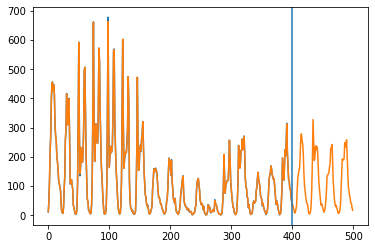

In [9]:
plt.plot(y)
plt.plot(np.append(fitted, predicted))
plt.axvline(400)
plt.show()